<a href="https://colab.research.google.com/github/richa-basak/cellxgene/blob/main/cellxgene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U cellxgene-census

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 121.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 8.8 MB/s eta 0:00:00
  Created whee

In [ ]:
import cellxgene_census

with cellxgene_census.open_soma(census_version="2024-07-01") as census:

    # Reads SOMADataFrame as a slice
    cell_metadata = census["census_data"]["homo_sapiens"].obs.read(
        value_filter = "sex == 'female' and cell_type in ['microglial cell', 'neuron']",
        column_names = ["assay", "cell_type", "tissue", "tissue_general", "suspension_type", "disease"]
    )

    # Concatenates results to pyarrow.Table
    cell_metadata = cell_metadata.concat()

    # Converts to pandas.DataFrame
    cell_metadata = cell_metadata.to_pandas()

    print(cell_metadata)

            assay        cell_type                          tissue  \
0       10x 5' v1           neuron                            lung   
1       10x 5' v1           neuron                            lung   
2       10x 5' v1           neuron                            lung   
3       10x 5' v1           neuron                            lung   
4       10x 5' v1           neuron                            lung   
...           ...              ...                             ...   
732776  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732777  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732778  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732779  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732780  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   

       tissue_general suspension_type   disease     sex  
0                lung            cell    normal  female  
1                lung            cell    no

In [ ]:
import cellxgene_census

with cellxgene_census.open_soma(census_version="2024-07-01") as census:
    adata = cellxgene_census.get_anndata(
        census = census,
        organism = "Homo sapiens",
        var_value_filter = "feature_id in ['ENSG00000161798', 'ENSG00000188229']",
        obs_value_filter = "sex == 'female' and cell_type in ['microglial cell', 'neuron']",
        column_names = {"obs": ["assay", "cell_type", "tissue", "tissue_general", "suspension_type", "disease"]},
    )

    print(adata)

<ipython-input-9-e5d8bd3e3ffb>:4: FutureWarning: The argument `column_names` is deprecated and will be removed in a future release. Please use `obs_column_names` and `var_column_names` instead.
  adata = cellxgene_census.get_anndata(


AnnData object with n_obs × n_vars = 732781 × 2
    obs: 'assay', 'cell_type', 'tissue', 'tissue_general', 'suspension_type', 'disease', 'sex'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'


In [ ]:
import cellxgene_census
import tiledbsoma

with cellxgene_census.open_soma(census_version="2024-07-01") as census:

    human = census["census_data"]["homo_sapiens"]
    query = human.axis_query(
       measurement_name = "RNA",
       obs_query = tiledbsoma.AxisQuery(
           value_filter = "tissue == 'brain' and sex == 'male'"
       )
    )
    iterator = query.X("raw").tables()

    # Get an iterative slice as pyarrow.Table
    raw_slice = next (iterator)
    print(raw_slice)
    query.close()

In [ ]:
!pip install scanpy


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.6 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=bb6c86af1a31fd8e20121be2054ae63f228a535a75bfe346ad98fe23ac8dbe85
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
import urllib
import scanpy

urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

adata = scanpy.read_h5ad('dataset.h5ad')
print(adata)
#print(adata.var)



AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


Matched Genes (gene name: ID name):
SLC26A3: ENSG00000091138
RASGEF1B: ENSG00000138670
LINGO1: ENSG00000169783
PDE4DIP: ENSG00000178104
LINC01609: ENSG00000253103
PHYHIP: ENSG00000168490

Unmatched Genes:
RP11-701H24.9
AC159540.1
RP11-289H16.1
RP11-219A15.1
RP11-745L13.2
Filtered AnnData object with genes of interest (by Ensembl IDs):
View of AnnData object with n_obs × n_vars = 23197 × 6
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stag

<ipython-input-7-26ceac80f384>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


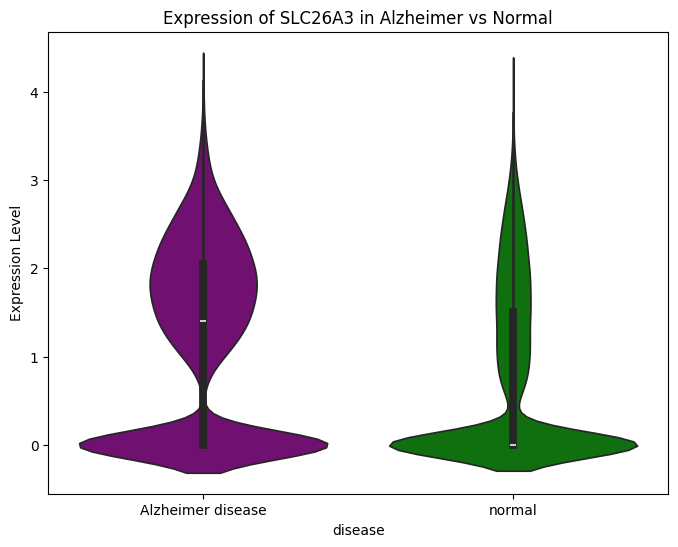

<ipython-input-7-26ceac80f384>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


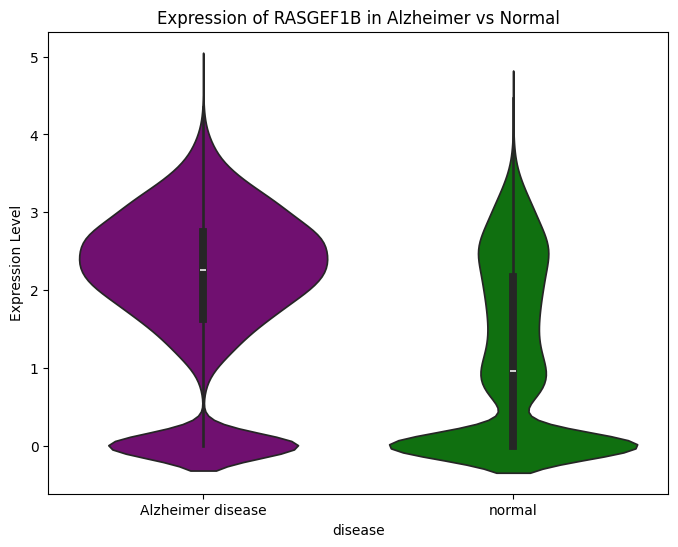

<ipython-input-7-26ceac80f384>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


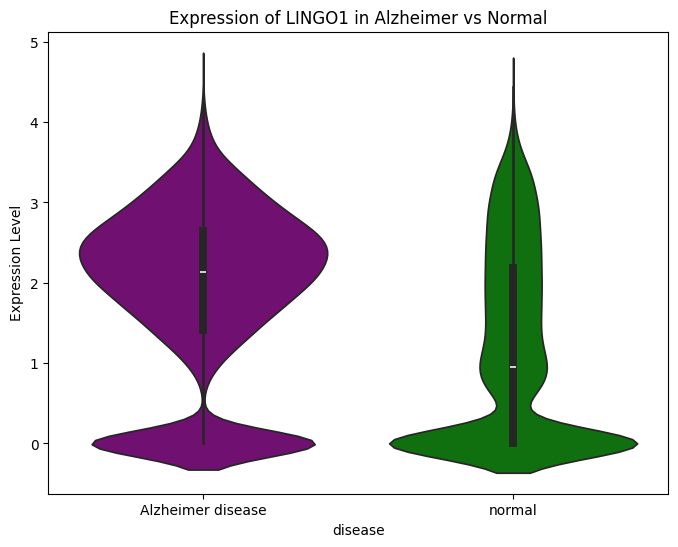

<ipython-input-7-26ceac80f384>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


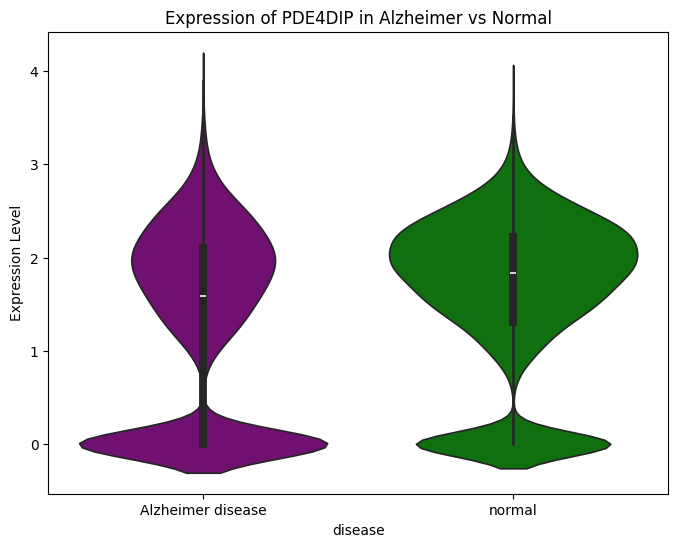

<ipython-input-7-26ceac80f384>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


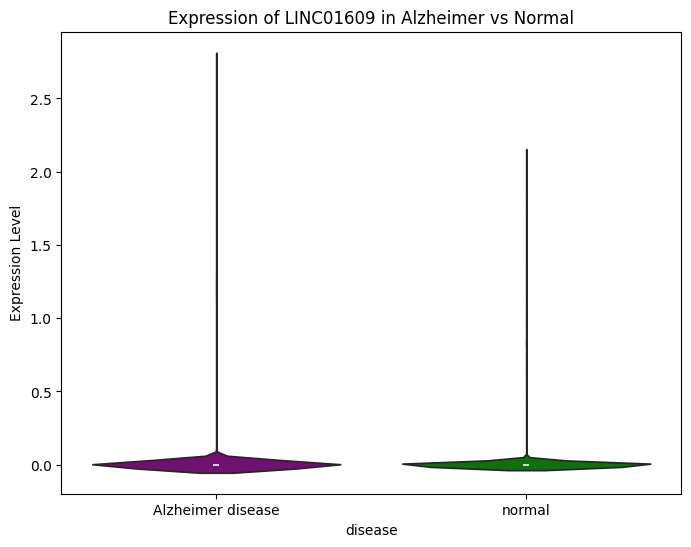

<ipython-input-7-26ceac80f384>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


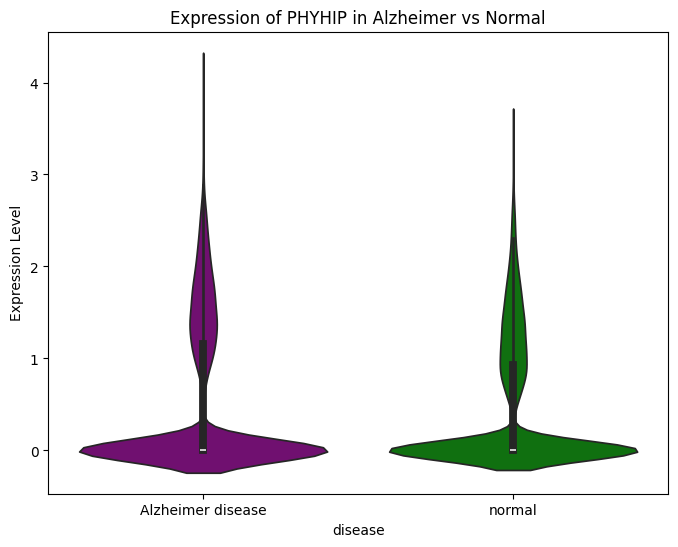

In [ ]:
import urllib.request
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
url_data = 'https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad'
urllib.request.urlretrieve(url_data, 'dataset.h5ad')
adata = sc.read_h5ad('dataset.h5ad')

# Define genes of interest
genes_of_interest = ["SLC26A3", "RASGEF1B", "RP11-701H24.9", "LINGO1", "PDE4DIP", "AC159540.1", "RP11-289H16.1", "RP11-219A15.1", "LINC01609", "PHYHIP", "RP11-745L13.2"]

# Create a mapping of feature names to Ensembl IDs
gene_mapping = {}
for index, row in adata.var.iterrows():
    gene_name = row['feature_name']  # This contains the gene name
    ensembl_id = index  # Use the index as the Ensembl ID
    gene_mapping[gene_name] = ensembl_id

#Find matched and unmatched genes
matched_genes = {}
unmatched_genes = []

for gene in genes_of_interest:
    if gene in gene_mapping:
        matched_genes[gene] = gene_mapping[gene]
    else:
        unmatched_genes.append(gene)

# Print matched and unmatched genes
print("Matched Genes (gene name: ID name):")
for gene, ensembl_id in matched_genes.items():
    print(f"{gene}: {ensembl_id}")

print("\nUnmatched Genes:")
for gene in unmatched_genes:
    print(gene)

# Filter ⁠ adata ⁠ to include only matched Ensembl IDs
matched_ids = list(matched_genes.values())
adata_filtered = adata[:, adata.var_names.isin(matched_ids)]

# Confirm the filtered AnnData object
print("\nFiltered AnnData object with genes of interest (by Ensembl IDs):")
print(adata_filtered)

# Differential Expression Analysis for Alzheimer's vs Normal
# Check cohort information
print("\nUnique values in 'disease' column:", adata.obs['disease'].unique())

# Filter data for Alzheimer's and normal subjects
alz_data = adata_filtered[adata.obs['disease'] == 'Alzheimer disease']
normal_data = adata_filtered[adata.obs['disease'] == 'normal']

# Perform differential expression analysis on the genes of interest
p_values = {}
gene_names_for_analysis = list(matched_genes.keys())  # Use gene names for analysis

for gene_name in gene_names_for_analysis:
    gene_id = matched_genes[gene_name]  # Get the Ensembl ID for the gene name
    # Extract expression values for each group
    alz_expression = alz_data[:, gene_id].X.toarray().flatten()
    normal_expression = normal_data[:, gene_id].X.toarray().flatten()

    # Conduct a t-test
    t_stat, p_val = ttest_ind(alz_expression, normal_expression, equal_var=False)
    p_values[gene_name] = p_val  # Store p-values with gene names

# Print p-values for each gene
print("\nDifferential expression results (p-values):")
for gene_name, p_val in p_values.items():
    print(f"{gene_name}: {p_val}")  # Print gene names instead of IDs

# Visualize significant genes. Plot expression levels for genes with significant differences (p-value < 0.05)
significant_genes = [gene_name for gene_name, p_val in p_values.items() if p_val < 0.05]
for gene_name in significant_genes:
    gene_id = matched_genes[gene_name]  # Get the corresponding Ensembl ID for visualization
    plt.figure(figsize=(8, 6))
    sns.violinplot(
        x=adata.obs['disease'],
        y=adata[:, gene_id].X.toarray().flatten(),
        data=adata.obs,
        palette={"Alzheimer disease": "purple", "normal": "green"}
    )
    plt.title(f'Expression of {gene_name} in Alzheimer vs Normal')  # Use gene name in title
    plt.ylabel('Expression Level')
    plt.show()


Matched Genes (gene name: ID name):
SLC26A3: ENSG00000091138
RASGEF1B: ENSG00000138670
LINGO1: ENSG00000169783
PDE4DIP: ENSG00000178104
LINC01609: ENSG00000253103
PHYHIP: ENSG00000168490

Unmatched Genes:
RP11-701H24.9
AC159540.1
RP11-289H16.1
RP11-219A15.1
RP11-745L13.2

Filtered AnnData object with genes of interest (by Ensembl IDs):
View of AnnData object with n_obs × n_vars = 23197 × 6
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_sta

<ipython-input-8-a2c4c802c1a9>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-8-a2c4c802c1a9>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-8-a2c4c802c1a9>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-8-a2c4c802c1a9>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-8-a2c4c802c1a9>:85: FutureWarning: 

Pass

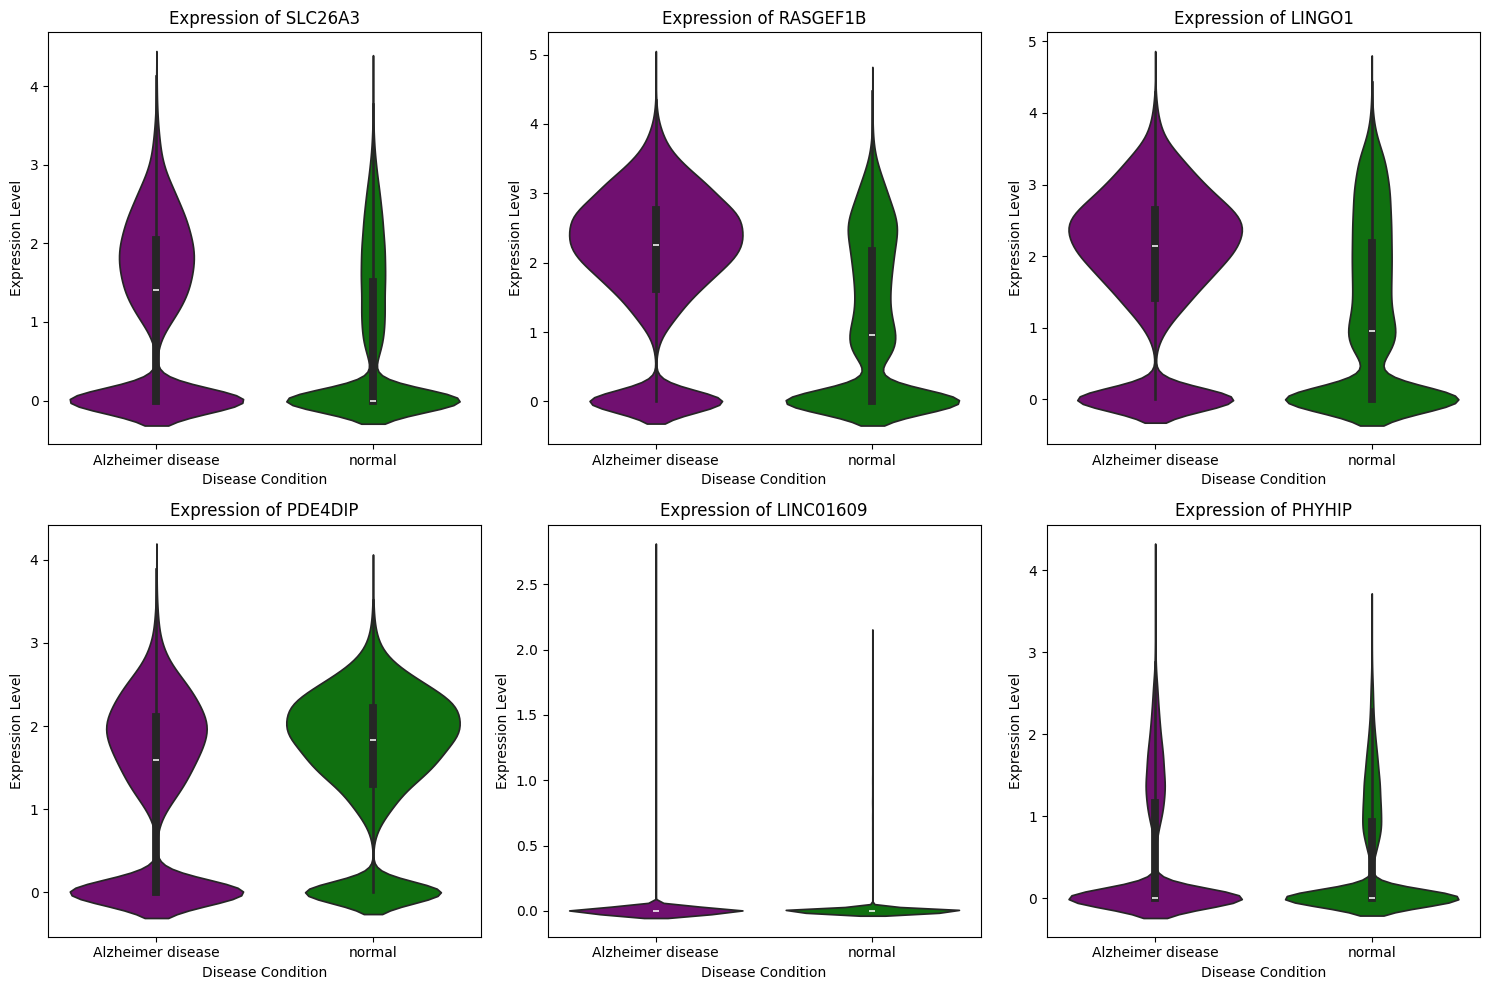

In [ ]:
import urllib.request
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
url_data = 'https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad'
urllib.request.urlretrieve(url_data, 'dataset.h5ad')
adata = sc.read_h5ad('dataset.h5ad')

# Define genes of interest
genes_of_interest = ["SLC26A3", "RASGEF1B", "RP11-701H24.9", "LINGO1", "PDE4DIP", "AC159540.1", "RP11-289H16.1", "RP11-219A15.1", "LINC01609", "PHYHIP", "RP11-745L13.2"]

# Create a mapping of feature names to Ensembl IDs
gene_mapping = {}
for index, row in adata.var.iterrows():
    gene_name = row['feature_name']
    ensembl_id = index
    gene_mapping[gene_name] = ensembl_id

# Find matched and unmatched genes
matched_genes = {}
unmatched_genes = []

for gene in genes_of_interest:
    if gene in gene_mapping:
        matched_genes[gene] = gene_mapping[gene]
    else:
        unmatched_genes.append(gene)

# Print matched and unmatched genes
print("Matched Genes (gene name: ID name):")
for gene, ensembl_id in matched_genes.items():
    print(f"{gene}: {ensembl_id}")

print("\nUnmatched Genes:")
for gene in unmatched_genes:
    print(gene)

# Filter adata to include only matched Ensembl IDs
matched_ids = list(matched_genes.values())
adata_filtered = adata[:, adata.var_names.isin(matched_ids)]

# Confirm the filtered AnnData object
print("\nFiltered AnnData object with genes of interest (by Ensembl IDs):")
print(adata_filtered)

# Differential Expression Analysis for Alzheimer's vs Normal
print("\nUnique values in 'disease' column:", adata.obs['disease'].unique())

# Filter data for Alzheimer's and normal subjects
alz_data = adata_filtered[adata.obs['disease'] == 'Alzheimer disease']
normal_data = adata_filtered[adata.obs['disease'] == 'normal']

# Perform differential expression analysis on the genes of interest
p_values = {}
gene_names_for_analysis = list(matched_genes.keys())

for gene_name in gene_names_for_analysis:
    gene_id = matched_genes[gene_name]
    alz_expression = alz_data[:, gene_id].X.toarray().flatten()
    normal_expression = normal_data[:, gene_id].X.toarray().flatten()

    t_stat, p_val = ttest_ind(alz_expression, normal_expression, equal_var=False)
    p_values[gene_name] = p_val

print("\nDifferential expression results (p-values):")
for gene_name, p_val in p_values.items():
    print(f"{gene_name}: {p_val}")

# Visualize significant genes in a grid
significant_genes = [gene_name for gene_name, p_val in p_values.items() if p_val < 0.05]
num_significant_genes = len(significant_genes)

# Set grid size for plots
n_cols = 3
n_rows = (num_significant_genes // n_cols) + (num_significant_genes % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plot each significant gene's expression
for idx, gene_name in enumerate(significant_genes):
    gene_id = matched_genes[gene_name]
    sns.violinplot(
        x=adata.obs['disease'],
        y=adata[:, gene_id].X.toarray().flatten(),
        data=adata.obs,
        palette={"Alzheimer disease": "purple", "normal": "green"},
        ax=axes[idx]
    )
    axes[idx].set_title(f'Expression of {gene_name}')
    axes[idx].set_ylabel('Expression Level')
    axes[idx].set_xlabel('Disease Condition')

# Remove unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


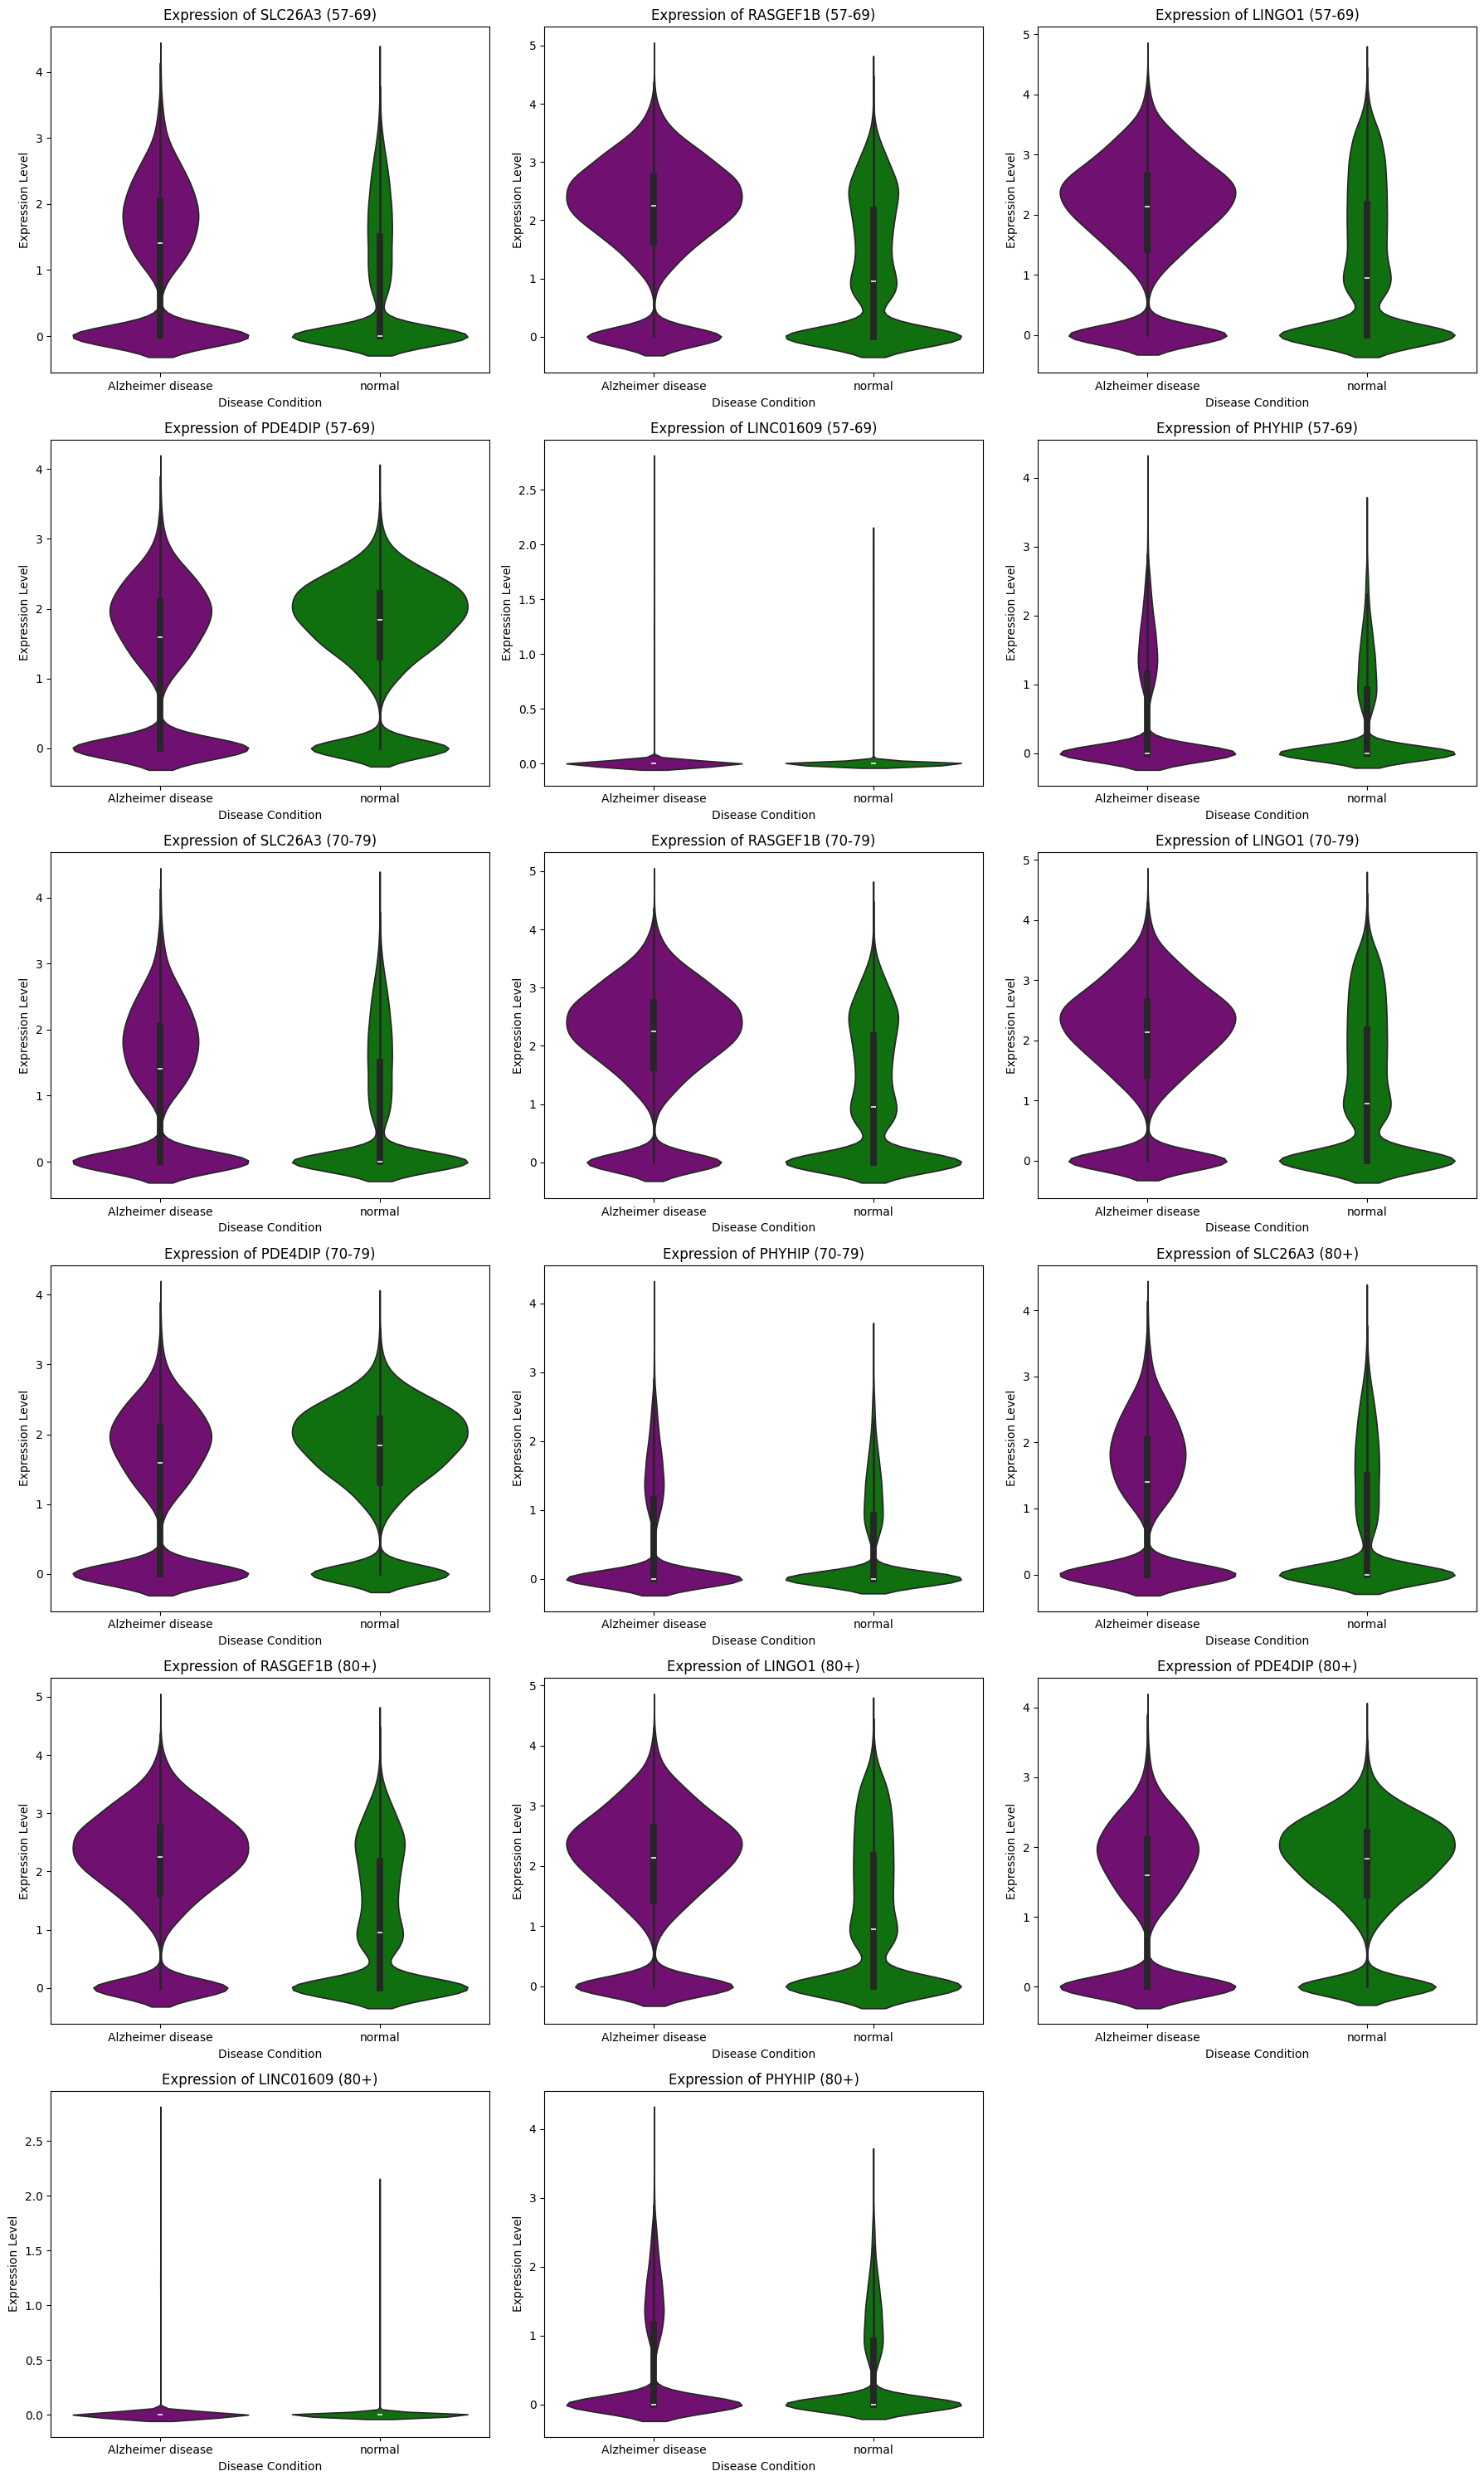

In [ ]:
import urllib.request
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import re

# Load the dataset
url_data = 'https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad'
urllib.request.urlretrieve(url_data, 'dataset.h5ad')
adata = sc.read_h5ad('dataset.h5ad')

# Define genes of interest
genes_of_interest = ["SLC26A3", "RASGEF1B", "RP11-701H24.9", "LINGO1", "PDE4DIP", "AC159540.1", "RP11-289H16.1", "RP11-219A15.1", "LINC01609", "PHYHIP", "RP11-745L13.2"]

# Create a mapping of feature names to Ensembl IDs
gene_mapping = {}
for index, row in adata.var.iterrows():
    gene_name = row['feature_name']
    ensembl_id = index
    gene_mapping[gene_name] = ensembl_id

# Find matched and unmatched genes
matched_genes = {}
unmatched_genes = []

for gene in genes_of_interest:
    if gene in gene_mapping:
        matched_genes[gene] = gene_mapping[gene]
    else:
        unmatched_genes.append(gene)

# Filter adata to include only matched Ensembl IDs
matched_ids = list(matched_genes.values())
adata_filtered = adata[:, adata.var_names.isin(matched_ids)]

# Define age groups based on parsed ages
age_groups = {"57-69": (57, 69), "70-79": (70, 79), "80+": (80, 120)}  # 80+ for ages 80 and above
p_values_by_age_group = {}

# Parse ages and create a new column `age_numeric` in adata.obs
def parse_age(stage):
    match = re.search(r'(\d+)', stage)
    return int(match.group(1)) if match else None

adata.obs['age_numeric'] = adata.obs['development_stage'].apply(parse_age).astype(float)  # Convert to numeric

# Analyze differential expression within each age group
for age_group, (age_min, age_max) in age_groups.items():
    # Filter for each age group based on parsed ages
    adata_age_group = adata_filtered[adata.obs['age_numeric'].between(age_min, age_max)]

    # Filter data for Alzheimer's and normal subjects in this age group
    alz_data = adata_age_group[adata_age_group.obs['disease'] == 'Alzheimer disease']
    normal_data = adata_age_group[adata_age_group.obs['disease'] == 'normal']

    # Perform differential expression analysis for each gene
    p_values = {}
    for gene_name, gene_id in matched_genes.items():
        alz_expression = alz_data[:, gene_id].X.toarray().flatten()
        normal_expression = normal_data[:, gene_id].X.toarray().flatten()

        # Conduct a t-test
        t_stat, p_val = ttest_ind(alz_expression, normal_expression, equal_var=False)
        p_values[gene_name] = p_val

    # Store p-values for this age group
    p_values_by_age_group[age_group] = p_values

# Calculate total subplots needed based on significant genes
total_plots = sum(len([gene for gene, p_val in p_values.items() if p_val < 0.05]) for p_values in p_values_by_age_group.values())
fig, axes = plt.subplots((total_plots + 2) // 3, 3, figsize=(18, ((total_plots + 2) // 3) * 5))
axes = axes.flatten()

plot_idx = 0
for age_group, p_values in p_values_by_age_group.items():
    significant_genes = [gene for gene, p_val in p_values.items() if p_val < 0.05]

    for gene_name in significant_genes:
        if plot_idx >= len(axes):
            break  # Avoid index out of bounds

        gene_id = matched_genes[gene_name]

        sns.violinplot(
            x=adata_filtered.obs['disease'],
            y=adata_filtered[:, gene_id].X.toarray().flatten(),
            hue=adata_filtered.obs['disease'],  # Set 'disease' as hue
            data=adata_filtered.obs,
            palette={"Alzheimer disease": "purple", "normal": "green"},
            ax=axes[plot_idx],
            legend=False  # Disable legend for each individual plot
        )

        axes[plot_idx].set_title(f'Expression of {gene_name} ({age_group})')
        axes[plot_idx].set_ylabel('Expression Level')
        axes[plot_idx].set_xlabel('Disease Condition')

        plot_idx += 1

# Remove unused axes
for ax in axes[plot_idx:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


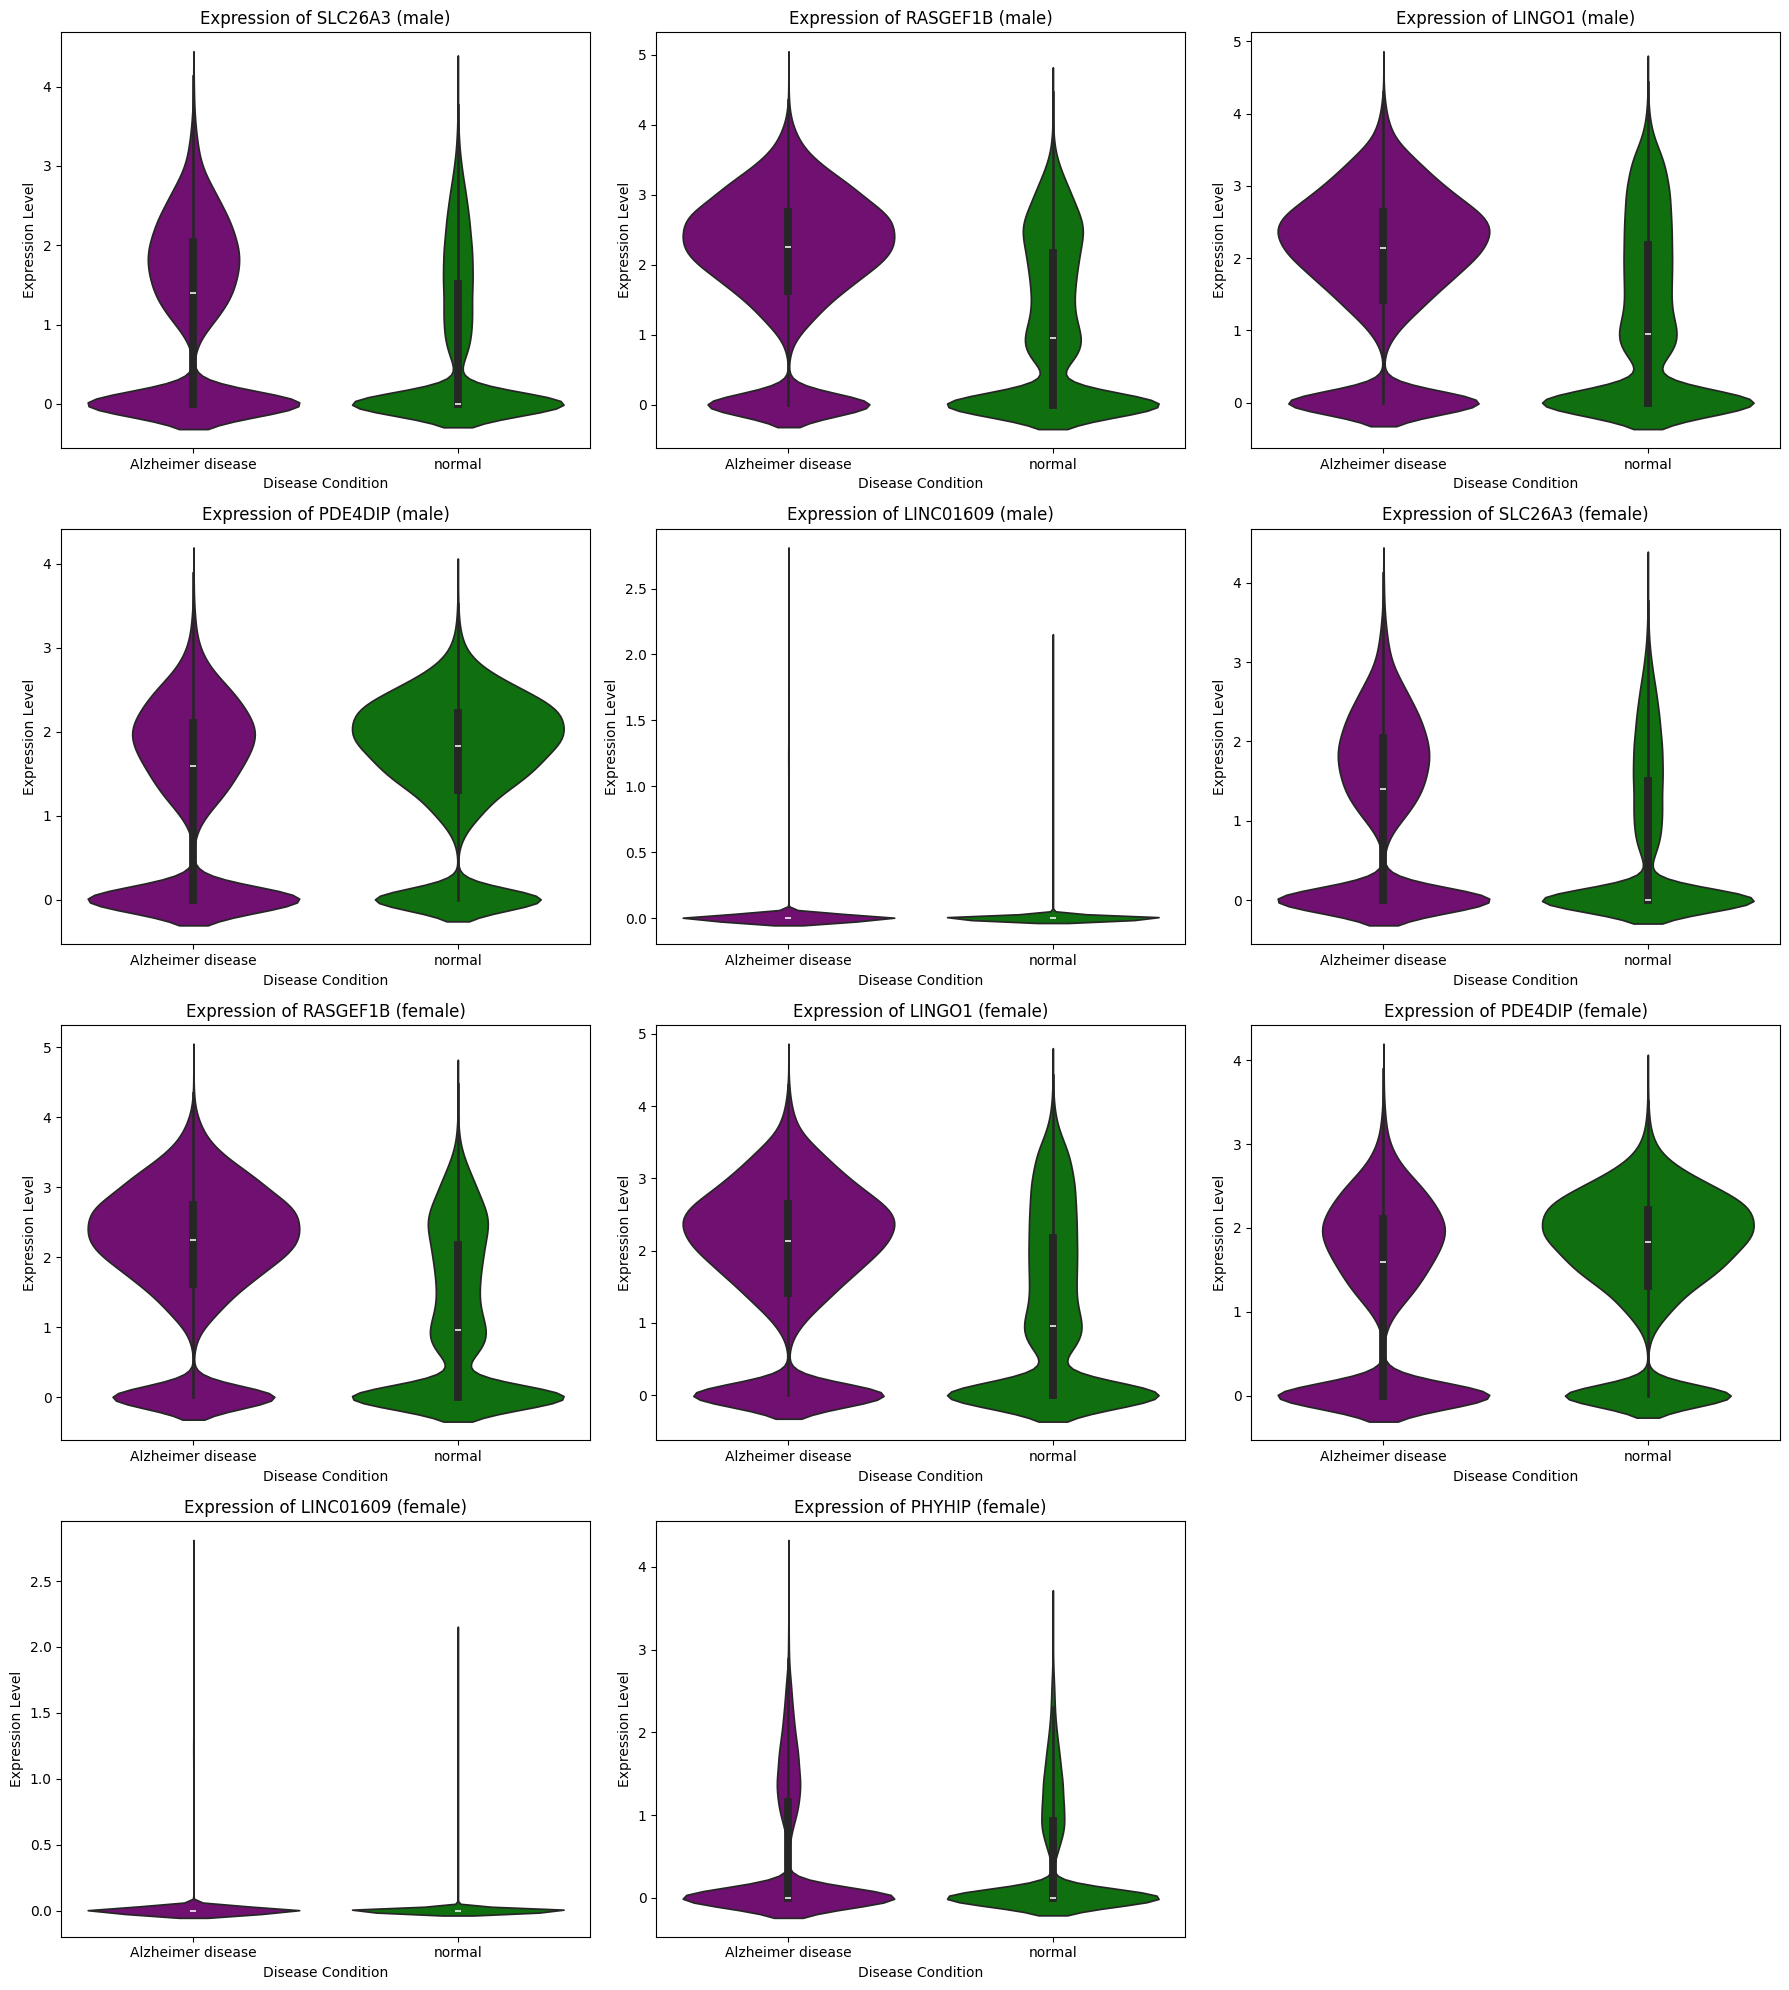

In [ ]:
import urllib.request
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
url_data = 'https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad'
urllib.request.urlretrieve(url_data, 'dataset.h5ad')
adata = sc.read_h5ad('dataset.h5ad')

# Define genes of interest
genes_of_interest = ["SLC26A3", "RASGEF1B", "RP11-701H24.9", "LINGO1", "PDE4DIP", "AC159540.1", "RP11-289H16.1", "RP11-219A15.1", "LINC01609", "PHYHIP", "RP11-745L13.2"]

# Create a mapping of feature names to Ensembl IDs
gene_mapping = {}
for index, row in adata.var.iterrows():
    gene_name = row['feature_name']
    ensembl_id = index
    gene_mapping[gene_name] = ensembl_id

# Find matched and unmatched genes
matched_genes = {}
unmatched_genes = []

for gene in genes_of_interest:
    if gene in gene_mapping:
        matched_genes[gene] = gene_mapping[gene]
    else:
        unmatched_genes.append(gene)

# Filter adata to include only matched Ensembl IDs
matched_ids = list(matched_genes.values())
adata_filtered = adata[:, adata.var_names.isin(matched_ids)]

# Dictionary to store p-values by sex group
p_values_by_sex = {}

# Analyze differential expression between male and female subjects
for sex in ['male', 'female']:
    adata_sex_group = adata_filtered[adata_filtered.obs['sex'] == sex]

    # Filter data for Alzheimer's and normal subjects in this sex group
    alz_data = adata_sex_group[adata_sex_group.obs['disease'] == 'Alzheimer disease']
    normal_data = adata_sex_group[adata_sex_group.obs['disease'] == 'normal']

    # Perform differential expression analysis for each gene
    p_values = {}
    for gene_name, gene_id in matched_genes.items():
        alz_expression = alz_data[:, gene_id].X.toarray().flatten()
        normal_expression = normal_data[:, gene_id].X.toarray().flatten()

        # Conduct a t-test
        t_stat, p_val = ttest_ind(alz_expression, normal_expression, equal_var=False)
        p_values[gene_name] = p_val

    # Store p-values for this sex group
    p_values_by_sex[sex] = p_values

# Calculate total subplots needed based on significant genes
total_plots = sum(len([gene for gene, p_val in p_values.items() if p_val < 0.05]) for p_values in p_values_by_sex.values())
fig, axes = plt.subplots((total_plots + 2) // 3, 3, figsize=(18, ((total_plots + 2) // 3) * 5))
axes = axes.flatten()

plot_idx = 0
for sex, p_values in p_values_by_sex.items():
    significant_genes = [gene for gene, p_val in p_values.items() if p_val < 0.05]

    for gene_name in significant_genes:
        if plot_idx >= len(axes):
            break  # Avoid index out of bounds

        gene_id = matched_genes[gene_name]

        sns.violinplot(
            x=adata_filtered.obs['disease'],
            y=adata_filtered[:, gene_id].X.toarray().flatten(),
            hue=adata_filtered.obs['disease'],  # Set 'disease' as hue
            data=adata_filtered.obs,
            palette={"Alzheimer disease": "purple", "normal": "green"},
            ax=axes[plot_idx],
            legend=False  # Disable legend for each individual plot
        )

        axes[plot_idx].set_title(f'Expression of {gene_name} ({sex})')
        axes[plot_idx].set_ylabel('Expression Level')
        axes[plot_idx].set_xlabel('Disease Condition')

        plot_idx += 1

# Remove unused axes
for ax in axes[plot_idx:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


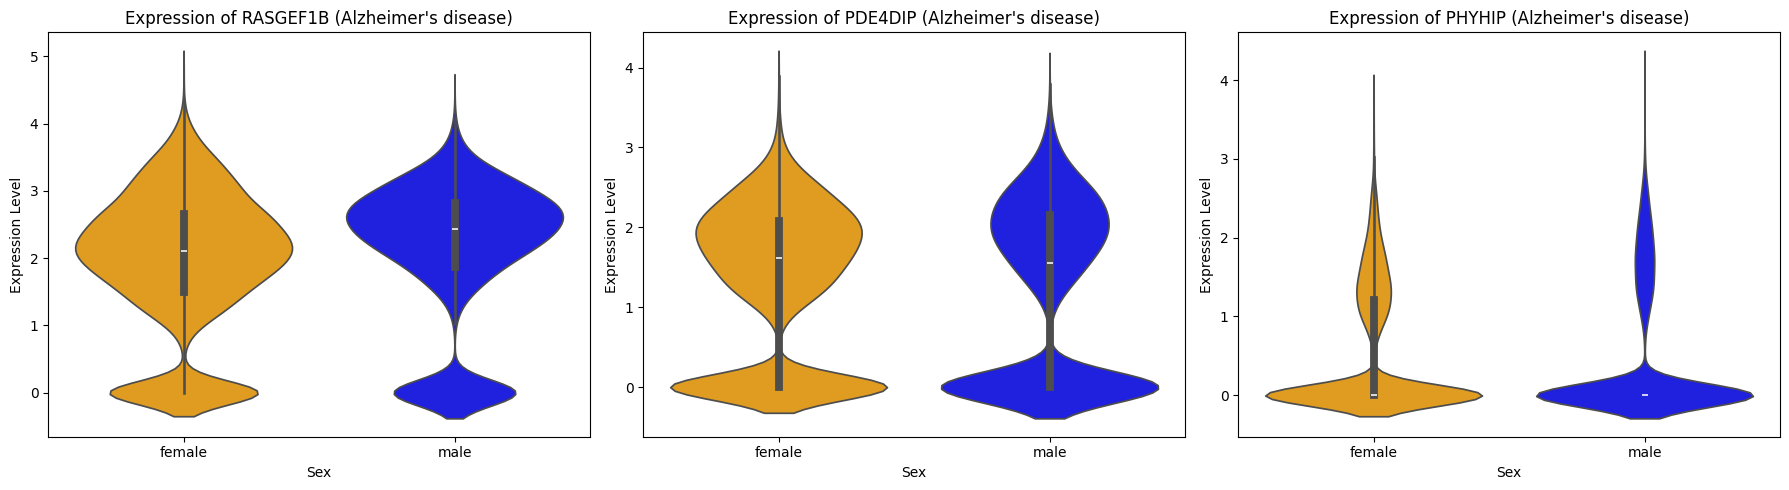

In [ ]:
import urllib.request
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
url_data = 'https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad'
urllib.request.urlretrieve(url_data, 'dataset.h5ad')
adata = sc.read_h5ad('dataset.h5ad')

# Define genes of interest
genes_of_interest = ["SLC26A3", "RASGEF1B", "RP11-701H24.9", "LINGO1", "PDE4DIP", "AC159540.1", "RP11-289H16.1", "RP11-219A15.1", "LINC01609", "PHYHIP", "RP11-745L13.2"]

# Create a mapping of feature names to Ensembl IDs
gene_mapping = {}
for index, row in adata.var.iterrows():
    gene_name = row['feature_name']
    ensembl_id = index
    gene_mapping[gene_name] = ensembl_id

# Find matched and unmatched genes
matched_genes = {}
unmatched_genes = []

for gene in genes_of_interest:
    if gene in gene_mapping:
        matched_genes[gene] = gene_mapping[gene]
    else:
        unmatched_genes.append(gene)

# Filter adata to include only matched Ensembl IDs
matched_ids = list(matched_genes.values())
adata_filtered = adata[:, adata.var_names.isin(matched_ids)]

# Filter the data for Alzheimer's disease subjects only
adata_alzheimers = adata_filtered[adata_filtered.obs['disease'] == 'Alzheimer disease']

# Dictionary to store p-values for each gene between male and female subjects within Alzheimer's disease group
p_values_by_gender = {}

# Perform differential expression analysis for each gene
for gene_name, gene_id in matched_genes.items():
    male_data = adata_alzheimers[adata_alzheimers.obs['sex'] == 'male', gene_id].X.toarray().flatten()
    female_data = adata_alzheimers[adata_alzheimers.obs['sex'] == 'female', gene_id].X.toarray().flatten()

    # Conduct a t-test between male and female Alzheimer's disease subjects for this gene
    t_stat, p_val = ttest_ind(male_data, female_data, equal_var=False)
    p_values_by_gender[gene_name] = p_val

# Filter for significant genes with p-value < 0.05
significant_genes = [gene for gene, p_val in p_values_by_gender.items() if p_val < 0.05]

# Calculate total subplots needed based on significant genes
fig, axes = plt.subplots((len(significant_genes) + 2) // 3, 3, figsize=(18, ((len(significant_genes) + 2) // 3) * 5))
axes = axes.flatten()

plot_idx = 0
for gene_name in significant_genes:
    if plot_idx >= len(axes):
        break  # Avoid index out of bounds

    gene_id = matched_genes[gene_name]

    sns.violinplot(
        x=adata_alzheimers.obs['sex'],
        y=adata_alzheimers[:, gene_id].X.toarray().flatten(),
        hue=adata_alzheimers.obs['sex'],
        palette={"male": "blue", "female": "orange"},
        ax=axes[plot_idx],
        legend=False  # Disable legend for each individual plot
    )

    axes[plot_idx].set_title(f'Expression of {gene_name} (Alzheimer\'s disease)')
    axes[plot_idx].set_ylabel('Expression Level')
    axes[plot_idx].set_xlabel('Sex')

    plot_idx += 1

# Remove unused axes
for ax in axes[plot_idx:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()
